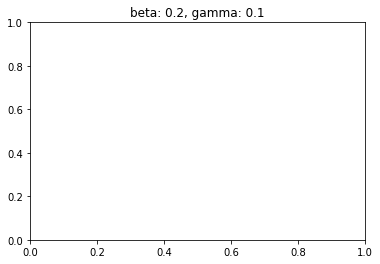

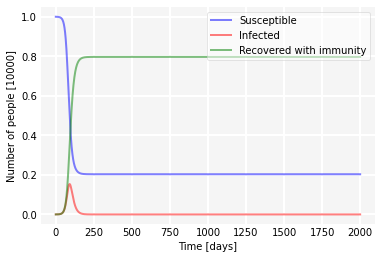

In [3]:

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

beta = 0.2
#mu = 0.002 # Birth and Death rate
gamma = 1./10

    
   

# Total population, N.
N = 10000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
#gamma = 1./10
    # A grid of time points (in days)
t = np.linspace(0, 2000, 2000)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - (gamma) * I 
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.title("beta: " + str(beta) + ", gamma: " + str(gamma))
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/10000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/10000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/10000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time [days]')
ax.set_ylabel('Number of people [10000]')
#ax.set_ylim([0.1,0.3])
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.set_facecolor('whitesmoke')
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend(loc = 'upper right')
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)    

  #  plt.savefig("/Users/edenmautner/Desktop/Thermo2i" + str(i))
    
#plt.show()